In [1]:
import matplotlib.pyplot as plt
import csv
import requests
url = "http://www.mambiente.munimadrid.es/opendata/horario.txt"
resp = requests.get(url)
print (resp)

<Response [200]>


In [2]:
# Descargo el fichero leído de la url y lo guardo en un directorio local.

path = 'data/'
with open (path + 'horario.txt', 'wb') as output:
    output.write(resp.content)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[18.0, 15.0, 14.0, 10.0, 13.0, 11.0, 21.0, 41.0, 99.0, 90.0, 78.0, 102.0, 124.0, 149.0, 75.0, 108.0, 146.0, 98.0, 96.0, 92.0, 88.0]


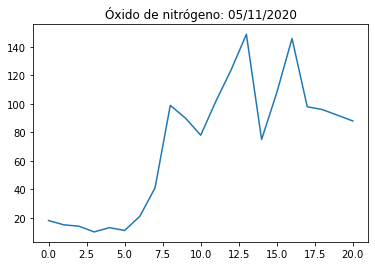

In [19]:
import requests
import csv
import matplotlib.pyplot as plt

# Leo el fichero desde el directorio local y voy 
path = 'data/'
with open (path + 'horario.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter = ',')
    for row in readCSV:
        ## row[0] + row[1] + row[2] en el fichero marcan la estación de medición, en nuestro caso '28079008' es Plaza de España
        ## row[3] corresponde con el índice de Óxido de nigrógeno.
        if (row[0] + row[1] + row[2]) == '28079008' and row[3] =='12':
            plt.title ("Óxido de nitrógeno: " + row[8] + "/" + row[7] + "/" + row[6])
            hora = 0
            desp = 9
            vs = []
            horas = []
            
            while hora <= 23:
                ## Esto quiere decir que si el valor de lectura en la hora corresponde con un valor válido.
                if row[desp+2*hora+1] == 'V':
                    vs.append(float(row[desp+2*hora]))
                    horas.append(hora)
                hora += 1
            print(horas)
            print(vs)

            plt.plot (x, vs)
            plt.show()    

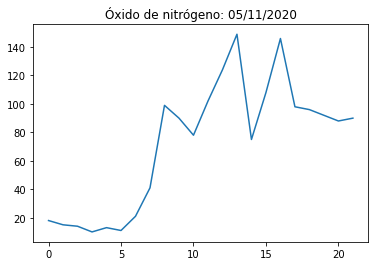

In [20]:
import requests
from contextlib import closing
import csv
import codecs 
import matplotlib.pyplot as plt

# Este código es igual que el anterior pero evita tener que grabar el ficher en disco y cargarlo completo en memoria.

## codecs permite leer los strings directamente en formato utf-8
## contextlib, permite leer directamente el valor devuelto por requests.get

## Suponed que leo de una url un fichero de texto, vosotros lo que hacéis es generar un fichero csv (o bien xlsx).
## Esta url que abro es pública y tiene la información de las estaciones de medición del aire en Madrid.

url = "http://www.mambiente.munimadrid.es/opendata/horario.txt"
with closing (requests.get(url, stream=True)) as r:
    reader = csv.reader(codecs.iterdecode(r.iter_lines(),'utf-8'), delimiter = ',')

    ## Con la instrucción requests.get leemos y lo cargamos en memoria sin necesidad de 
    ## guardar el fichero.
    
    for row in reader:
        ## row[0] + row[1] + row[2] en el fichero marcan la estación de medición, en nuestro caso '28079008' es Plaza de España
        ## row[3] corresponde con el índice de Óxido de nigrógeno.
        if (row[0] + row[1] + row[2]) == '28079008' and row[3] =='12':
            plt.title ("Óxido de nitrógeno: " + row[8] + "/" + row[7] + "/" + row[6])
            hora = 0
            desp = 9
            vs = []
            horas = []
            
            while hora <= 23:
                ## Esto quiere decir que si el valor de lectura en la hora corresponde con un valor válido.
                if row[desp+2*hora+1] == 'V':
                    vs.append(float(row[desp+2*hora]))
                    horas.append(hora)
                hora += 1
            plt.plot (horas, vs)
            plt.show()    

In [21]:
from bs4 import BeautifulSoup
url="data/ejemplo.html"
with open(url, "r") as f:
    page = f.read()

soup = BeautifulSoup(page,"html.parser")
print(soup.prettify())

## la variable soup contiene la página en forma de cadena de caracteres, que convertimos en un formato interno estructurado
## usando la constructora BeautifulSoup, e indicamos que debe emplear el analizador sintáctico "parser".
## Si la página es muy compleja, podemos utilizar otro analizador "html5lib"

<!DOCTYPE HTML>
<html>
 <head>
  <title>
   Título de ejemplo
  </title>
 </head>
 <body>
  <div id="date">
   Fecha 13/05/2020
  </div>
  <div id="content">
   Esta es mi página WEB
  </div>
 </body>
</html>


In [22]:
hijosDoc = list(soup.children)
print([type(item) for item in hijosDoc])

## El primero bs4.element.Doctype corresponde a la primera línea
## El segundo bs4.element.NavigableString corresponde con el carácter \n (fin de línea)
## El tercero bs4.element.Tag corresponde al documento html en sí.

[<class 'bs4.element.Doctype'>, <class 'bs4.element.NavigableString'>, <class 'bs4.element.Tag'>]


In [23]:
print(hijosDoc)

['HTML', '\n', <html>
<head>
<title>Título de ejemplo</title>
</head>
<body>
<div id="date"> Fecha 13/05/2020 </div>
<div id="content"> Esta es mi página WEB </div>
</body>
</html>]


In [24]:
html = hijosDoc[2]
print(list(html.children))

['\n', <head>
<title>Título de ejemplo</title>
</head>, '\n', <body>
<div id="date"> Fecha 13/05/2020 </div>
<div id="content"> Esta es mi página WEB </div>
</body>, '\n']


In [25]:
## Si nos interesara un elemento en particular, podemos hacerlo de la siguiente forma:
body=list(html.children)[3]
print(list(body.children))

['\n', <div id="date"> Fecha 13/05/2020 </div>, '\n', <div id="content"> Esta es mi página WEB </div>, '\n']


In [26]:
divDate = list(body.children)[1]
print(divDate.get_text())

 Fecha 13/05/2020 


In [27]:
# En nuestro primer Web Scraping hemos ido recorriendo el documento desde la raíz, vamos a ver ahora cómo podemos
# recorrer el documento utilizando la biblioteca BeautifulSoup y el método find

import requests
url="https://www.boe.es/informacion/hora_oficial.php"
r=requests.get(url)
print(r)

<Response [200]>


In [28]:
## A continuación buscamos el elemento p con class = centrador 

from bs4 import BeautifulSoup
soup = BeautifulSoup(r.content, "html.parser")
centrador = soup.find("p", class_="centrador")
print(centrador.get_text())

jueves,  5 de noviembre de 2020, 22:59:10


In [2]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

chromedriver_location = 'C:/chromedriver/chromedriver.exe'
driver = webdriver.Chrome(chromedriver_location)

url = "https://www.sage.com/es-es/"
driver.get(url)